# California Housing ML Model to Predict Housing Prices

In [9]:
# importing the required libraries
import sklearn.datasets as datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
print("All required libraries are imported.")

All required libraries are imported.


## Loading Dataset


In [10]:
# Importing california housing dataset from sklearn
california = datasets.fetch_california_housing()
print("California housing dataset is imported.")

California housing dataset is imported.


In [65]:
# # saving data to a csv file
# data = pd.DataFrame(data= np.c_[california['data'], california['target']],
#                      columns= california['feature_names'] + ['MedHouseVal'])

# data.to_csv('california_housing.csv', index=False)
# print("California housing dataset is saved to california_housing.csv file.")

California housing dataset is saved to california_housing.csv file.


## Data Preprocessing

In [11]:
# Converting to pandas dataframe
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target
print("Converted to pandas dataframe.")
print(data.head())


Converted to pandas dataframe.
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [12]:
# Checking for missing values
print("Checking for missing values:")
print(data.isnull().sum())


Checking for missing values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [20]:
# Defining features and target variable
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']
print("Features and target variable defined.")

Features and target variable defined.


## Data Visualization

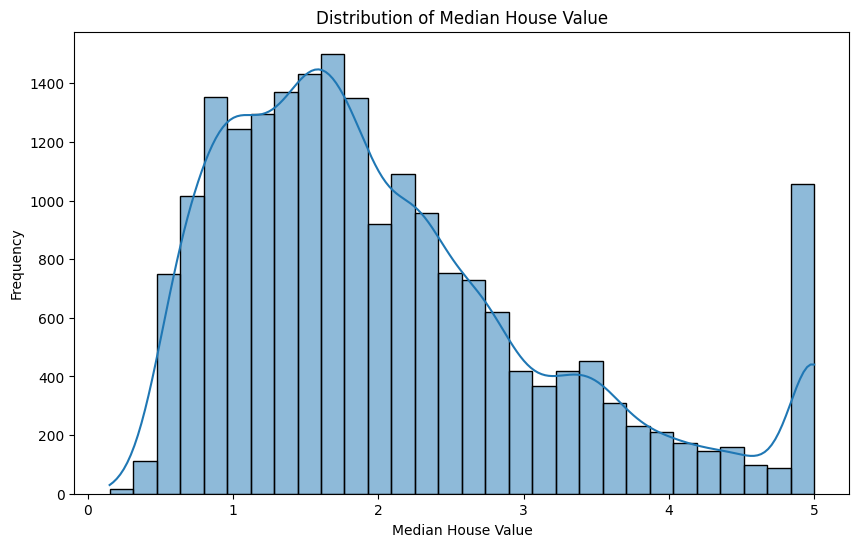

In [21]:
# Visualizing different features
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['MedHouseVal'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


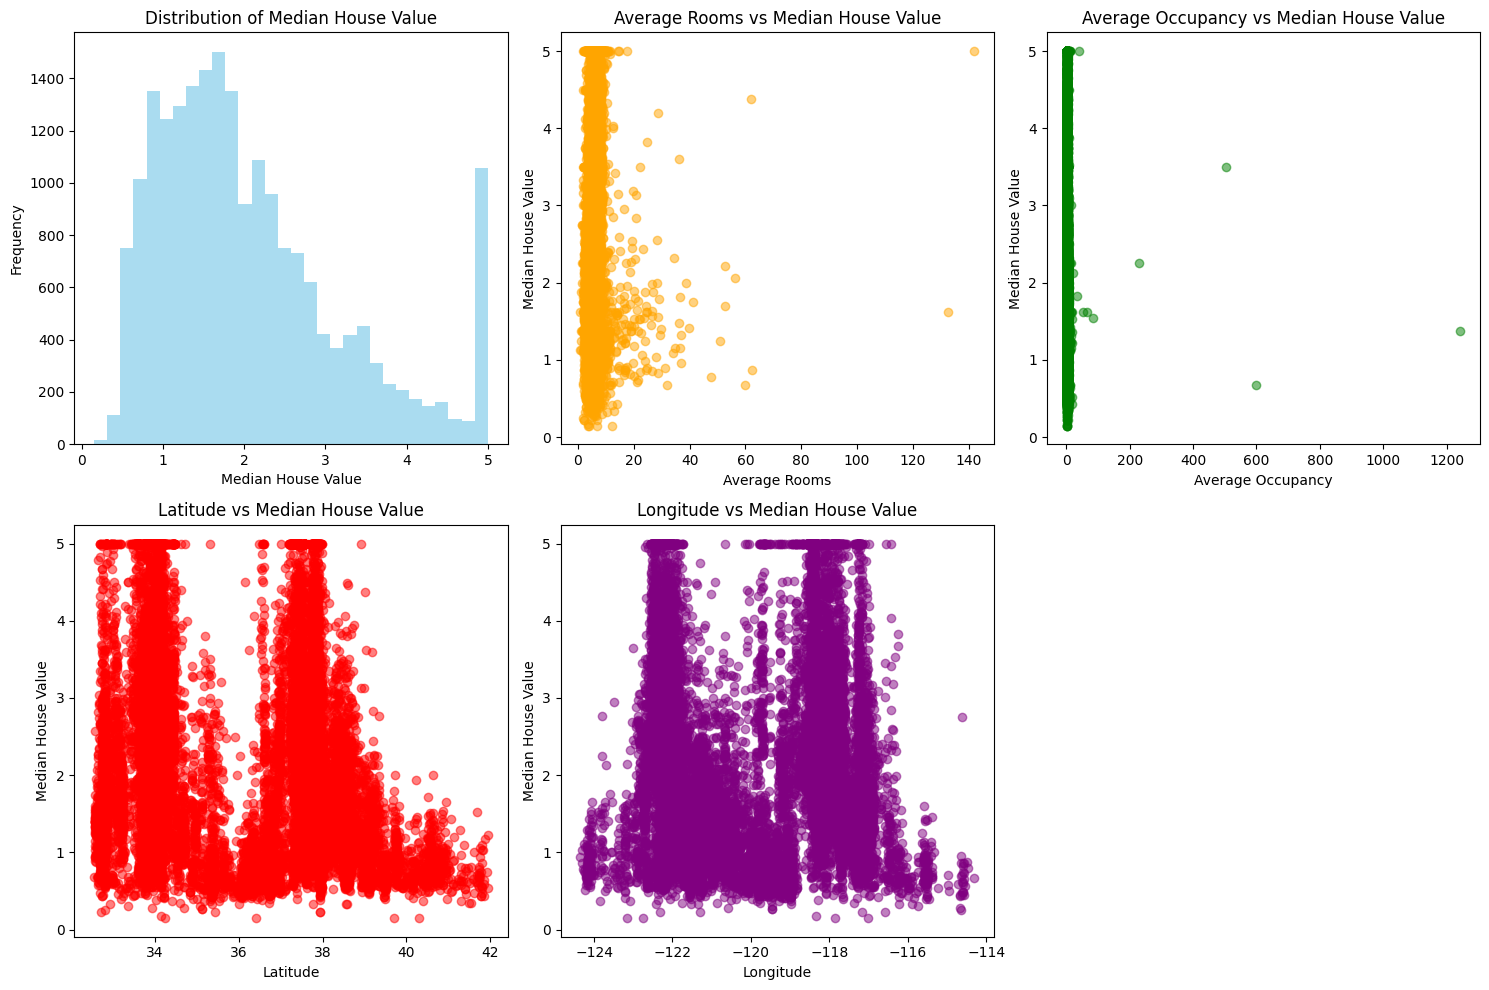

In [26]:
# creating visulizations for different features
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.hist(y, bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.subplot(2, 3, 2)
plt.scatter(data['AveRooms'], y, alpha=0.5, color='orange')
plt.title('Average Rooms vs Median House Value')
plt.xlabel('Average Rooms')
plt.ylabel('Median House Value')
plt.subplot(2, 3, 3)
plt.scatter(data['AveOccup'], y, alpha=0.5, color='green')
plt.title('Average Occupancy vs Median House Value')
plt.xlabel('Average Occupancy')
plt.ylabel('Median House Value')
plt.subplot(2, 3, 4)
plt.scatter(data['Latitude'], y, alpha=0.5, color='red')
plt.title('Latitude vs Median House Value')
plt.xlabel('Latitude')
plt.ylabel('Median House Value')
plt.subplot(2, 3, 5)
plt.scatter(data['Longitude'], y, alpha=0.5, color='purple')
plt.title('Longitude vs Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()




### Data Splitting in Training & Testing Sets

In [36]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset split into training and testing sets.")

# Viewing data shape
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


print(f"Training Set: {X_train.shape[0]} samples ({len(X_train)/len(X)*100: .2f}%)")
print(f"Testing Set: {X_test.shape[0]} samples ({len(X_test)/len(X)*100: .2f}%)")


Dataset split into training and testing sets.
X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)
Training Set: 16512 samples ( 80.00%)
Testing Set: 4128 samples ( 20.00%)


### Feature Scaling

In [37]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling applied.")

print("Original X_train statistics:")
print(f"Mean: {X_train.mean().mean():.3f}")
print(f"Std Dev: {X_train.std().mean():.3f}")

print("Original X_test statistics:")
print(f"Mean: {X_test.mean().mean():.3f}")
print(f"Std Dev: {X_test.std().mean():.3f}")

print("Scaled X_train statistics:")
print(f"Mean: {X_train_scaled.mean().mean():.3f}")
print(f"Std Dev: {X_train_scaled.std().mean():.3f}")


Feature scaling applied.
Original X_train statistics:
Mean: 173.079
Std Dev: 146.263
Original X_test statistics:
Mean: 172.462
Std Dev: 142.214
Scaled X_train statistics:
Mean: 0.000
Std Dev: 1.000


## Linear Regression Model Training

In [38]:
# Importing Linear Regression model
from sklearn.linear_model import LinearRegression

# Training the Logistic Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print("Model training completed.")


Model training completed.


In [39]:
# Making predictions on the test set
y_pred = model.predict(X_test_scaled)
print("Predictions on the test set completed.")
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Predictions on the test set completed.
Mean Squared Error: 0.556
R^2 Score: 0.576


In [41]:
# Model evaluation summary
print("\nModel Evaluation Summary:")
print(f"The model explains {r2*100: .2f}% of the vaiance in the target variable.")
print(f"Average prediction error is approximatly {np.sqrt(mse)*100:.2f}k.")


Model Evaluation Summary:
The model explains  57.58% of the vaiance in the target variable.
Average prediction error is approximatly 74.56k.


## Visualizing Actual vs Predicted Values

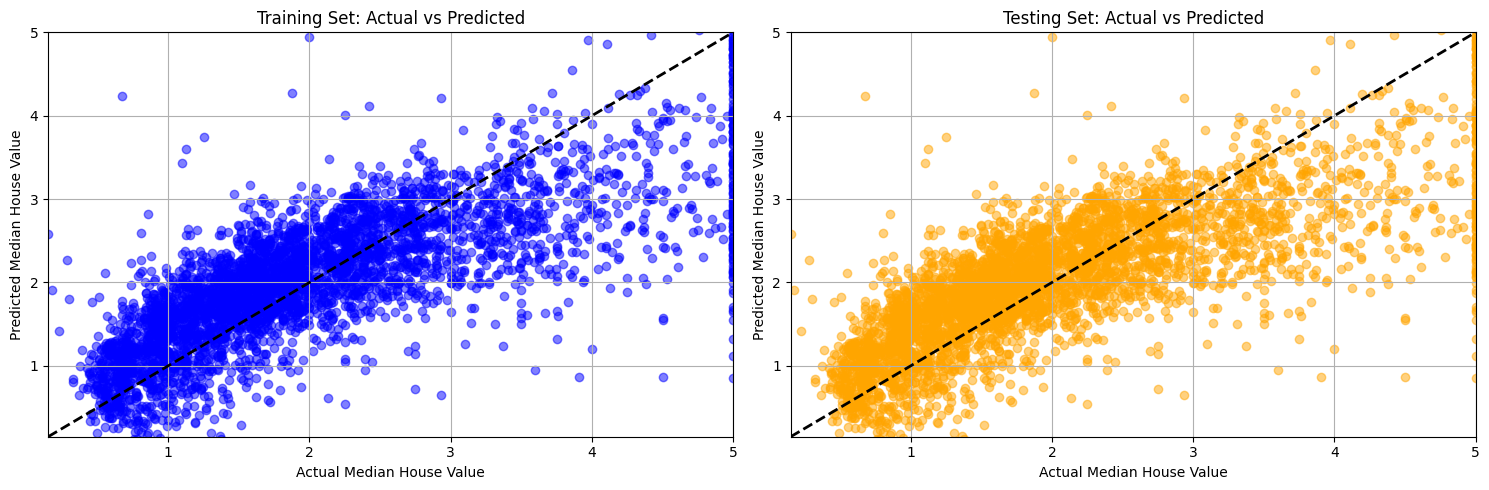

In [43]:
# visualizing the predictions vs actual values
plt.figure(figsize=(15, 5))

# Taining set predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlim(y_train.min(), y_train.max())
plt.ylim(y_train.min(), y_train.max())
plt.grid()
# Testing set predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.title('Testing Set: Actual vs Predicted')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.tight_layout()
plt.show()




## Saving the Model using Pickle

In [47]:
# Saving the model using pickle
import pickle
model_file_name = 'linear_regression_model.pkl'
with open(model_file_name, 'wb') as file:
    pickle.dump(model, file)
    
print(f"Model saved to {model_file_name}.")

# Saving encoding file
scaler_file_name = 'scaler.pkl'
with open(scaler_file_name, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Scaler saved to {scaler_file_name}.")


Model saved to linear_regression_model.pkl.
Scaler saved to scaler.pkl.


In [48]:
# Loading the model and scaler for future use
with open(model_file_name, 'rb') as file:
    loaded_model = pickle.load(file)
with open(scaler_file_name, 'rb') as file:
    loaded_scaler = pickle.load(file)
print("Model and scaler loaded from disk.")


Model and scaler loaded from disk.
